## ***Visión por Computadora - 2024***
### *Lista 01 - Ejercicio 3*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


5. Aplicar transformaciones apropiadas para mejorar la visualización de las siguientes imágenes: saigon.jpeg, monkey.jpeg y rice.jpg.


Para la imagen rice.jpg, aplicar un algoritmo de segmentaci´on binaria que identifique correctamente todos los granos de arroz.


Referencias:

- https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html
- https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/
- https://medium.com/swlh/image-segmentation-using-k-means-clustering-46a60488ae71
- https://www.sciencedirect.com/science/article/pii/S1877050915014143
- https://medium.com/mlearning-ai/k-means-clustering-71a875dbce3c

#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
# Cargamos las imágenes
rice_img = cv2.imread('imgs/rice.jpg', cv2.IMREAD_GRAYSCALE)
monkey_img = cv2.imread('imgs/monkey.jpeg', cv2.IMREAD_GRAYSCALE)
saigon_img = cv2.imread('imgs/saigon.jpeg', cv2.IMREAD_GRAYSCALE)

# Verificamos que las imágenes se hayan cargado correctamente
loaded_images = all(img is not None for img in [rice_img, monkey_img, saigon_img])

# Si se cargaron correctamente, procedemos con la ecualización de histograma
if loaded_images:
    # Ecualización de histograma para mejorar el contraste
    equalized_monkey = cv2.equalizeHist(monkey_img)
    equalized_saigon = cv2.equalizeHist(saigon_img)
else:
    equalized_monkey, equalized_saigon = None, None

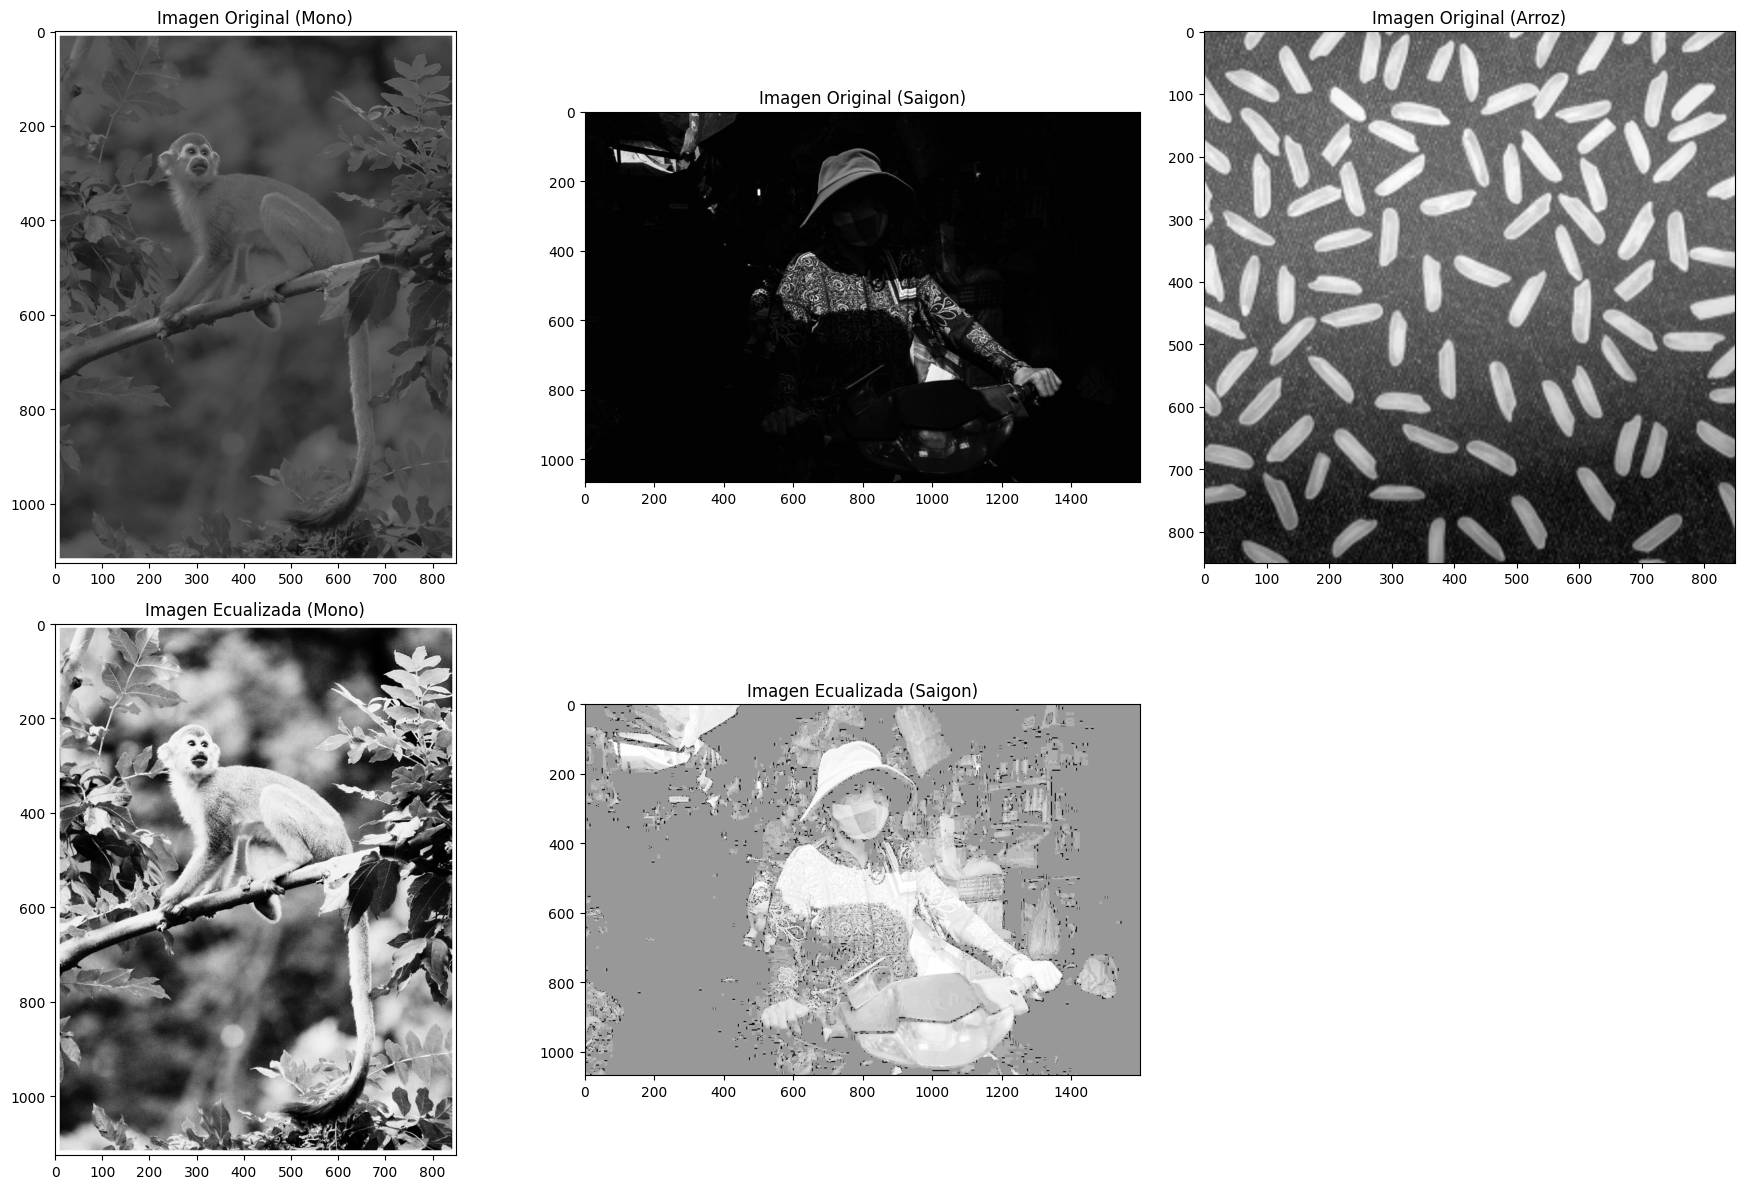

In [9]:
# Ecualización de histograma para mejorar el contraste
equalized_monkey = cv2.equalizeHist(monkey_img)
equalized_saigon = cv2.equalizeHist(saigon_img)

# Mostrar las imágenes originales y las imágenes ecualizadas
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(monkey_img, cmap='gray')
axs[0, 0].set_title('Imagen Original (Mono)')
axs[0, 1].imshow(saigon_img, cmap='gray')
axs[0, 1].set_title('Imagen Original (Saigon)')
axs[0, 2].imshow(rice_img, cmap='gray')
axs[0, 2].set_title('Imagen Original (Arroz)')

axs[1, 0].imshow(equalized_monkey, cmap='gray')
axs[1, 0].set_title('Imagen Ecualizada (Mono)')
axs[1, 1].imshow(equalized_saigon, cmap='gray')
axs[1, 1].set_title('Imagen Ecualizada (Saigon)')

# Dejamos el último espacio en blanco por ahora
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

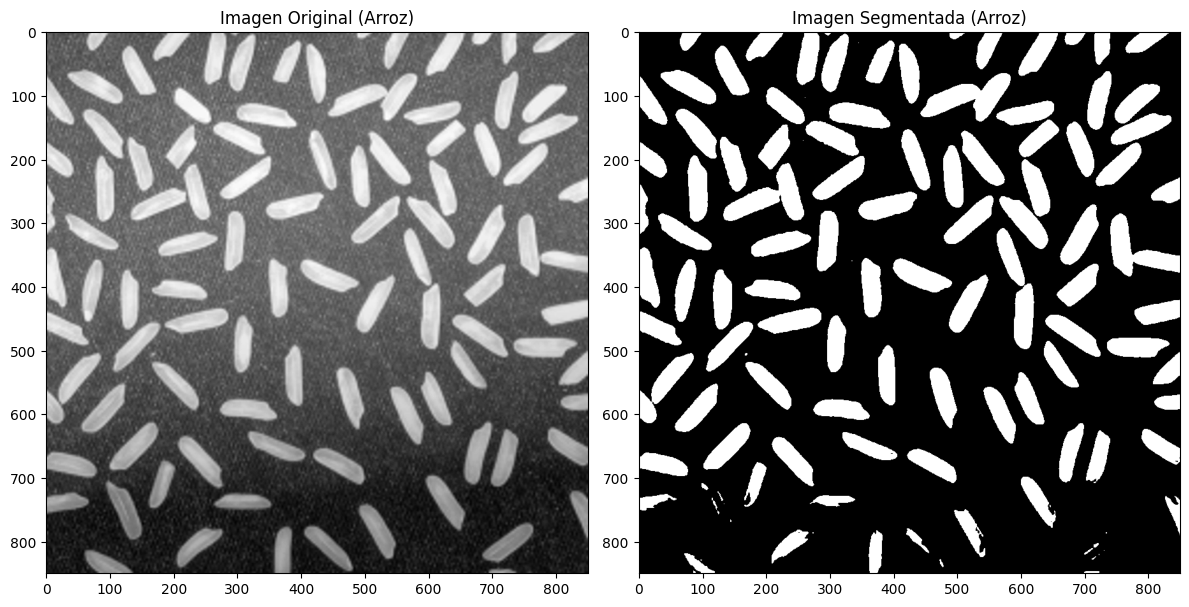

In [10]:
# Aplicar un filtro Gaussiano para suavizar la imagen y reducir el ruido
blurred_rice_img = cv2.GaussianBlur(rice_img, (5, 5), 0)

# Utilizar un método de umbralización para convertir la imagen en binaria
# Se utiliza el método de Otsu para determinar automáticamente un umbral óptimo
_, binary_rice_img = cv2.threshold(blurred_rice_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen segmentada
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(rice_img, cmap='gray')
axs[0].set_title('Imagen Original (Arroz)')
axs[1].imshow(binary_rice_img, cmap='gray')
axs[1].set_title('Imagen Segmentada (Arroz)')

plt.tight_layout()
plt.show()
